### Lab 4 Task 3
#### Обрано пункти b та c

#### Завдання b:

In [6]:
from transformers import pipeline

# Переклад
print("\n1. Переклад з англійської на українську:")
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-uk")

# Текст взяв з https://en.wikipedia.org/wiki/Wikipedia
text_en = """
Wikipedia is a free online encyclopedia written and maintained by a community of volunteers, known as Wikipedians, through open collaboration and the wiki software MediaWiki. 
Founded by Jimmy Wales and Larry Sanger in 2001, Wikipedia has been hosted since 2003 by the Wikimedia Foundation, an American nonprofit organization funded mainly by donations from readers. 
Wikipedia is the largest and most-read reference work in history. """
translation = translator(text_en)
print(f"Переклад: {translation[0]['translation_text']}")

# Текст взяв з https://uk.wikipedia.org/wiki/%D0%90%D1%82%D0%B0%D0%BA%D0%B0_%D0%A1%D0%A8%D0%90_%D0%BD%D0%B0_%D0%92%D0%B5%D0%BD%D0%B5%D1%81%D1%83%D0%B5%D0%BB%D1%83_(2026)
text = """
Атака США на Венесуелу (2026) — військова операція, проведена Збройними силами Сполучених Штатів 3 січня 2026 року, 
під час якої американські війська завдали серії авіаударів по військових та інших об'єктах на півночі Венесуели, включно зі столицею Каракасом. 
Того ж дня американські спецпризначенці затримали президента Ніколаса Мадуро й його дружину Сілію Флорес. 
"""

# 2. Створення короткого змісту
print("\n2. Summarization:")
summarizer = pipeline("summarization", model="csebuetnlp/mT5_multilingual_XLSum")

summary = summarizer(text, max_length=30, min_length=10, do_sample=False)
print(f"Підсумок: {summary[0]['summary_text']}")

# 3. Zero-Shot Classification
print("\n3. Zero-Shot Classification:")
classifier = pipeline("zero-shot-classification", model="MoritzLaurer/mDeBERTa-v3-base-mnli-xnli")

candidate_labels = ["спорт", "технології", "політика", "війна"]

classification_result = classifier(text, candidate_labels, multi_label=False)

print("Результат класифікації:")
for label, score in zip(classification_result['labels'], classification_result['scores']):
    print(f"- {label}: {score:.4f}")


1. Переклад з англійської на українську:


Device set to use cuda:0


Переклад: Вікіпедія - це безкоштовна онлайн- енциклопедія, написана і підтримана спільнотою волонтерів, відомою як Вікіпедія, відкритою співробітництвом і Вікі програмним програмним забезпеченням MediaWiki. Заснована Джіммі Уельсом і Ларрі Сандером у 2001 році, Вікіпедією з 2003 р., Американська бездоходна організація фінансувалася в основному пожертвами читачів. Вікіпедія - це найбільша і найбільш прочитана праця в історії.

2. Summarization:


c:\Users\chechelyk\Desktop\Study\IAD\New folder\IAD_LABS\venv\Lib\site-packages\transformers\convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cuda:0


Підсумок: Американські спецпризначенці затримали президента Венесуели Ніколаса Мадуро та його дружину Сілію Флорес

3. Zero-Shot Classification:


Device set to use cuda:0


Результат класифікації:
- війна: 0.9382
- політика: 0.0615
- спорт: 0.0002
- технології: 0.0001


#### Завдання c:

Device: cuda


Loading pipeline components...: 100%|██████████| 7/7 [00:03<00:00,  2.13it/s]


Генерація зображення


100%|██████████| 50/50 [02:52<00:00,  3.45s/it]


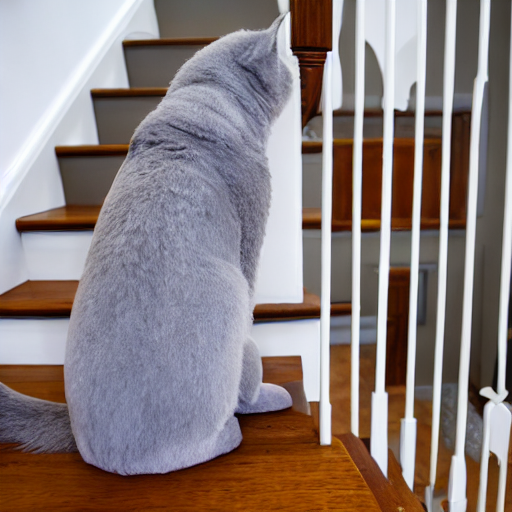

In [14]:
from diffusers import StableDiffusionPipeline
import torch
from IPython.display import display

device = "cuda" if torch.cuda.is_available() else "cpu"

print(f"Device: {device}")

# Завантажуємо модель
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to(device)

# Промпт для генерації
prompt = "a funny grey cat on the stairs in cartoon style"
negative_prompt = "low quality, blurry, distorted, deformed cat, ugly, bad anatomy, grainy, watermark, text"

print("Генерація зображення")
image = pipe(prompt, negative_prompt=negative_prompt).images[0]

# Відображення результату
display(image)